# Лабораторна робота 11
# Згорткові нейронні мережі

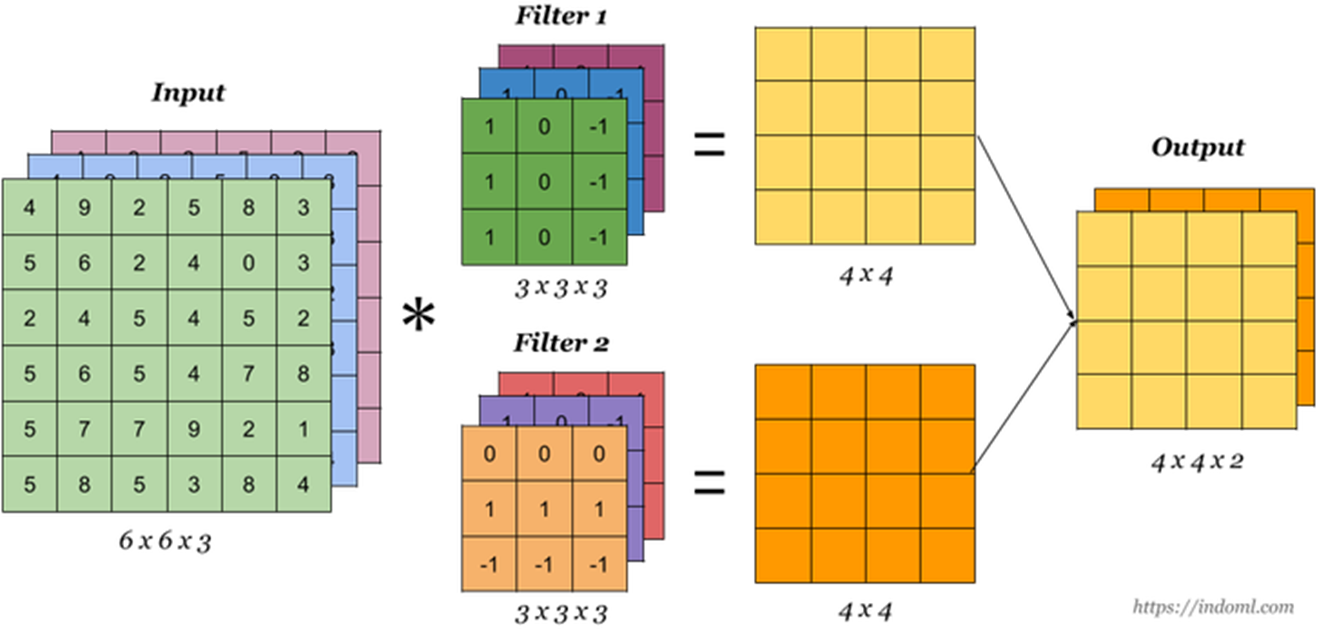

## Частина 1. Згорткова мережа для MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
image shape (28, 28)


In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
input_dim = img_rows * img_cols

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 165s 338ms/step - loss: 0.2401 - accuracy: 0.9262 - val_loss: 0.0543 - val_accuracy: 0.9815
Epoch 2/12
469/469 [==============================] - 143s 304ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0370 - val_accuracy: 0.9874
Epoch 3/12
469/469 [==============================] - 143s 305ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0398 - val_accuracy: 0.9861
Epoch 4/12
469/469 [==============================] - 143s 306ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 5/12
469/469 [==============================] - 144s 306ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 6/12
469/469 [==============================] - 143s 304ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0288 - val_accuracy: 0.9899
Epoch 7/12
469/469 [==============================] - 138s 295ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0270 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03160843625664711
Test accuracy: 0.9908000230789185


## Частина 2. Згорткова нейромережа для CIFAR

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

In [ ]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

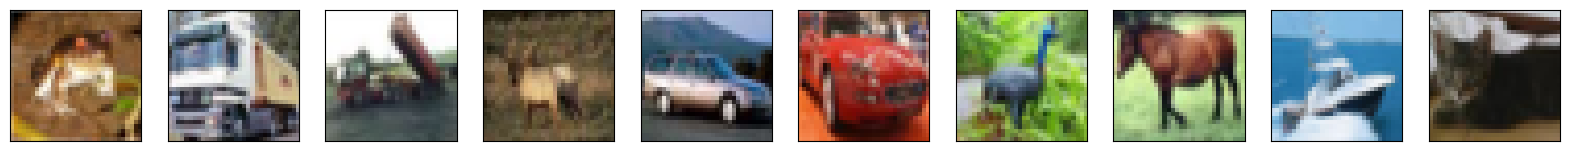

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Build the model

In [ ]:
alpha = 0.02

model = keras.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(train_features.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                 

In [ ]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

model.fit(train_features, train_labels, validation_split=0.2, epochs=50, batch_size=128, callbacks = my_callbacks, verbose=1)

Epoch 1/50
313/313 [==============================] - 51s 158ms/step - loss: 1.5950 - accuracy: 0.4184 - val_loss: 1.3557 - val_accuracy: 0.5216
Epoch 2/50
313/313 [==============================] - 46s 147ms/step - loss: 1.2240 - accuracy: 0.5638 - val_loss: 1.1111 - val_accuracy: 0.6130
Epoch 3/50
313/313 [==============================] - 46s 148ms/step - loss: 1.0485 - accuracy: 0.6282 - val_loss: 1.0251 - val_accuracy: 0.6451
Epoch 4/50
313/313 [==============================] - 47s 150ms/step - loss: 0.9329 - accuracy: 0.6723 - val_loss: 0.9699 - val_accuracy: 0.6645
Epoch 5/50
313/313 [==============================] - 45s 144ms/step - loss: 0.8460 - accuracy: 0.7043 - val_loss: 0.9298 - val_accuracy: 0.6825
Epoch 6/50
313/313 [==============================] - 46s 147ms/step - loss: 0.7707 - accuracy: 0.7308 - val_loss: 0.8744 - val_accuracy: 0.6992
Epoch 7/50
313/313 [==============================] - 44s 142ms/step - loss: 0.7001 - accuracy: 0.7529 - val_loss: 0.8410 - val_ac

In [ ]:
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.1551246643066406
Test accuracy: 0.7049999833106995


## Завдання для виконання

1. Виконати приклади, наведені вище
2. Побудувати CNN для IMBD (визначити найкращу архітектуру)
3. Ознайомитись з архітектурою згорткових мереж AlexNet(2012), VGG(2014), GoogleNet(2014), ResNet(2015), Mobile Net. В звіті навести їх архітектуру та описати принцип роботи.
4. *Побудувати CNN для обраного на kaggle датасету (визначити найкращу архітектуру)